In [318]:
%matplotlib inline
import datacube
from datetime import datetime
import numpy as np

dc=datacube.Datacube(app='test')
indexers = {'x': (130, 131), 'y': (-13, -12)}  #, 'output_crs':'EPSG:4326', 'resolution':(-25,25)}
data = dc.load(product='ITEM_2_0_0', **indexers)
conf = dc.load(product='ITEM_CONF_2_0_0', **indexers)

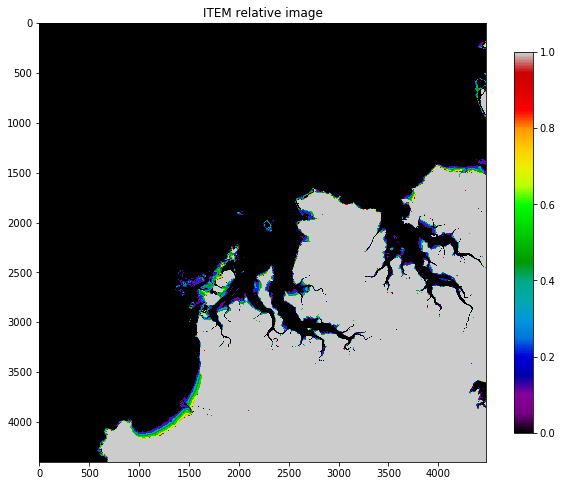

In [323]:
#%matplotlib notebook

import matplotlib as mpl
import matplotlib.pyplot as plt
#import Ipython
#from IPython.display import display
rel=data.relative
fake_saturation = 3000
clipped_visible = rel.where(rel<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)
#scaled = clipped_visible
fig=plt.figure(figsize = (10,28)) 
ax1=fig.add_subplot(111)
#ax2=fig.add_subplot(122)
#cmap = mpl.colors.ListedColormap(['b', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600','m','c','r'])
#bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
ax1.set_title('ITEM relative image')
im=ax1.imshow(scaled.isel(time=0),  cmap=mpl.cm.spectral)
#im=ax1.imshow(scaled.isel(time=0),  cmap=mpl.cm.spectral, norm=mpl.colors.Normalize(vmin=1,vmax=9))
#im.set_clim(0,9)
#im2 = ax2.imshow(scales_conf.isel(time=0), cmap=mpl.cm.spectra)
fig.colorbar(im,shrink=0.25)

plt.show()




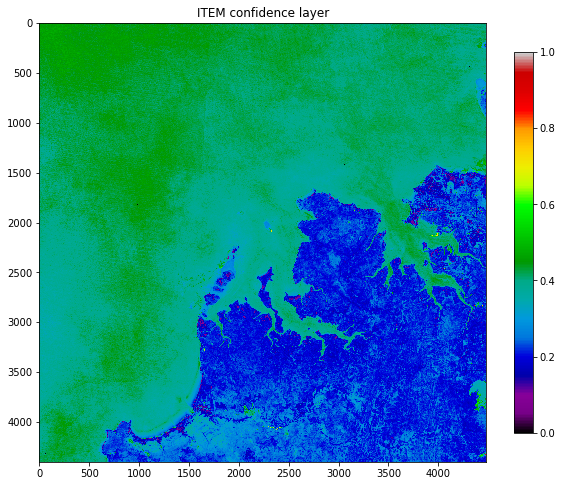

In [322]:
con=conf.stddev
fake_saturation = 3000
clipped_visible = con.where(con<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)
#scaled = clipped_visible
fig=plt.figure(figsize = (10,28)) 
ax1=fig.add_subplot(111)
#ax2=fig.add_subplot(122)
#cmap = mpl.colors.ListedColormap(['b', '#ffcc66','#ffffcc' , '#ccff66' , '#2eb82e', '#009933' , '#006600','m','c','r'])
#bounds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
#norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
ax1.set_title('ITEM confidence layer')
im=ax1.imshow(scaled.isel(time=0),  cmap=mpl.cm.spectral)
#im=ax1.imshow(scaled.isel(time=0),  cmap=mpl.cm.spectral, norm=mpl.colors.Normalize(vmin=1,vmax=9))
#im.set_clim(0,9)
#im2 = ax2.imshow(scales_conf.isel(time=0), cmap=mpl.cm.spectra)
fig.colorbar(im,shrink=0.25)
plt.show()

In [359]:
#Low High composites load data
newindex = {'x': (130.6, 130.9), 'y': (-12.30, -12.50), 'measurements': ['green', 'nir', 'swir1']}
cntindex = {'x': (130.6, 130.9), 'y': (-12.30, -12.50)}
lc = dc.load(product='LTC_2_0_0', **newindex)
hc = dc.load(product='HTC_2_0_0', **newindex)
lcon = dc.load(product='LTC_CNT_2_0_0', **cntindex)
hcon = dc.load(product='HTC_CNT_2_0_0', **cntindex)

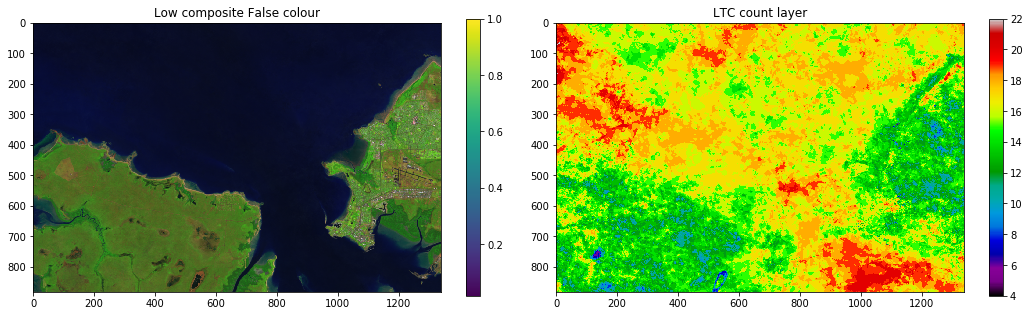

In [380]:
#Low 20% composite and pixel count

comp = lc.isel(time=0)
false_col = comp.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color') 
clipped_visible = false_col.where(false_col<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

fig=plt.figure(figsize = (15,8)) 
ax1=fig.add_subplot(121)
ax1.set_title('Low composite False colour')
im=ax1.imshow(scaled,  interpolation='nearest')
fig.colorbar(im,shrink=0.5)

con=lcon.count_observations
ax1=fig.add_subplot(122)
ax1.set_title('LTC count layer')
im=ax1.imshow(con.isel(time=0),  cmap=mpl.cm.spectral)
fig.colorbar(im,shrink=0.5)

plt.tight_layout()
plt.show()


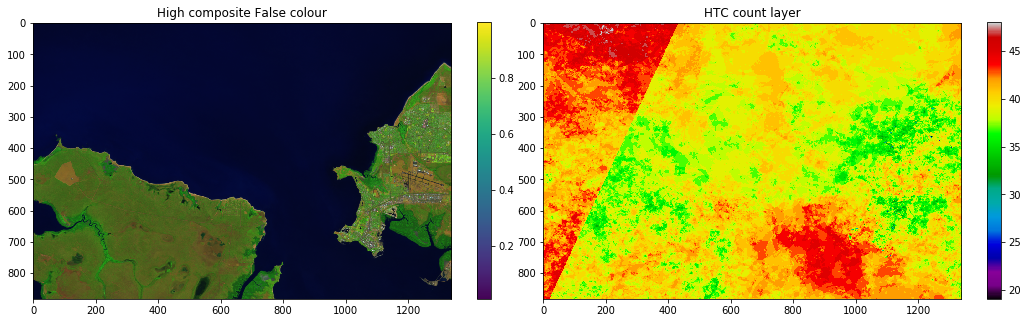

In [381]:
# high 20% composite and pixel count

comp = hc.isel(time=0)
false_col = comp.to_array(dim='color').sel(color=['swir1', 'nir', 'green']).transpose('y', 'x', 'color') 
clipped_visible = false_col.where(false_col<fake_saturation).fillna(fake_saturation)
max_val = clipped_visible.max(['y', 'x'])
scaled = (clipped_visible / max_val)

fig=plt.figure(figsize = (15,8)) 
ax1=fig.add_subplot(121)
ax1.set_title('High composite False colour')
im=ax1.imshow(scaled,  interpolation='nearest')
fig.colorbar(im,shrink=0.5)

plt.tight_layout()
#plt.xlim(100, 300)
#plt.show()

con=hcon.count_observations
ax2=fig.add_subplot(122)
ax2.set_title('HTC count layer')
im=ax2.imshow(con.isel(time=0),  cmap=mpl.cm.spectral)
fig.colorbar(im,shrink=0.5)
plt.show()
